# Python Pandas: Tratando e analisando dados

## 09. Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [2]:
dados = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')

In [3]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


In [10]:
value_serie = dados['Valor m2']

In [11]:
Q1 = value_serie.quantile(.25)
Q1

21.25

In [13]:
Q3 = value_serie.quantile(.75)
Q3

42.31

In [21]:
IIQ = Q3 - Q1

In [22]:
limite_inf = Q1 - 1.5 * IIQ
limite_inf

-10.340000000000003

In [23]:
limite_sup = Q3 + 1.5 * IIQ
limite_sup

73.9

In [24]:
selecao = (value_serie >= limite_inf) & (value_serie <= limite_sup)
dados_new = dados[selecao]

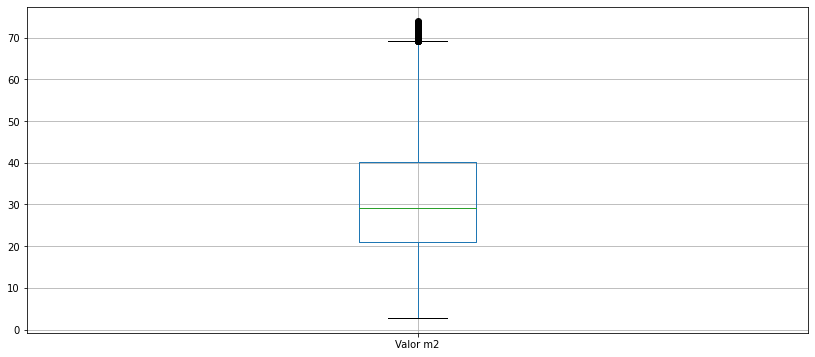

In [25]:
dados_new.boxplot(['Valor m2'])